In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
female_activity = pd.read_csv("FemAct.csv")
female_temp = pd.read_csv("FemTemp.csv")
male_activity = pd.read_csv("MaleAct.csv")
male_temp = pd.read_csv("MaleTemp.csv")

In [8]:
# constants
minutes_per_day = 1440
days = 14

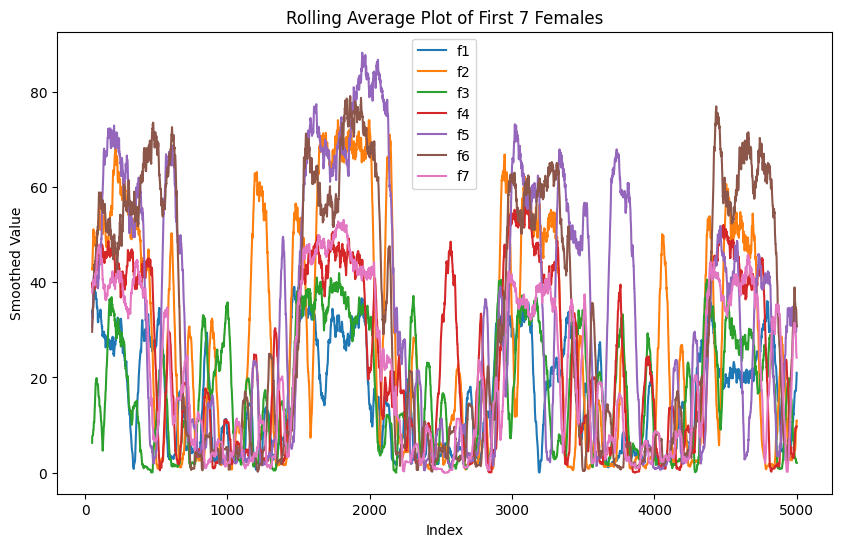

In [23]:
female_activity.iloc[:5000, :7].rolling(window=50).mean().plot(figsize=(10, 6))
plt.title('Rolling Average Plot of First 7 Females')
plt.xlabel('Index')
plt.ylabel('Smoothed Value')
plt.show()

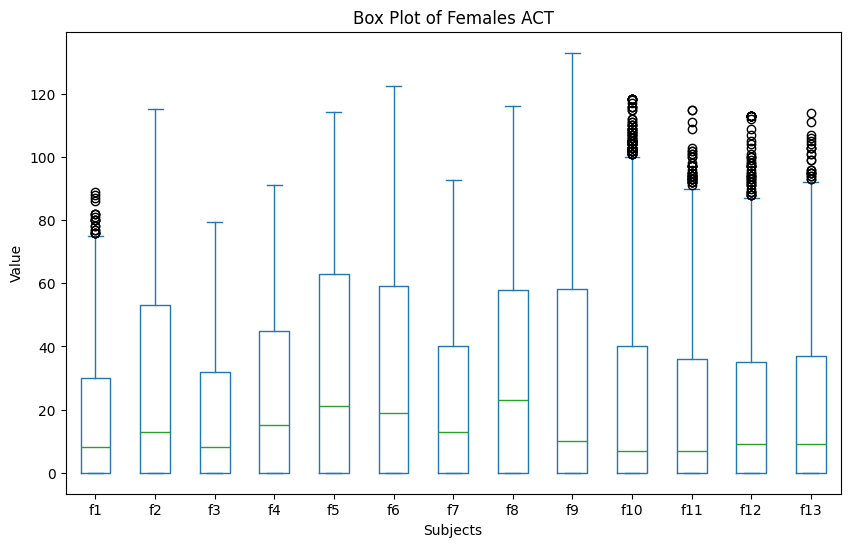

In [24]:
female_activity.iloc[:5000, :].plot(kind='box', figsize=(10, 6))
plt.title('Box Plot of Females ACT')
plt.xlabel('Subjects')
plt.ylabel('Value')
plt.show()

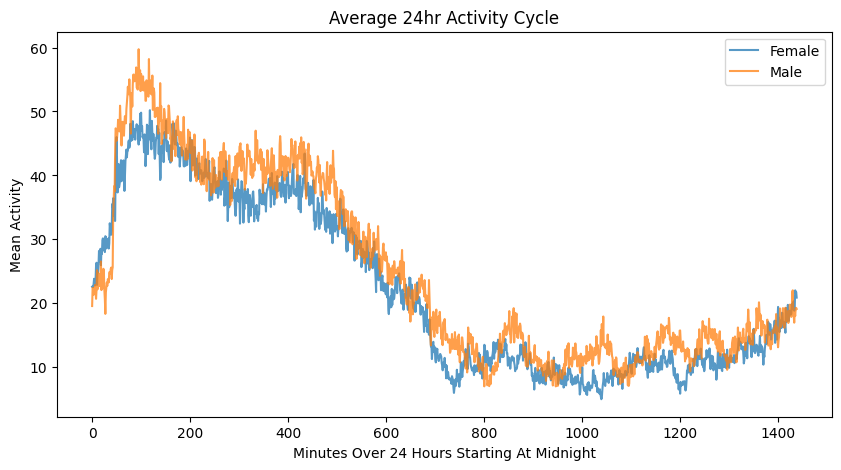

In [21]:
# Average 24 Activity Cycle
# Compute mean per minute across days (per mouse)
female_avg = female_activity.groupby(female_activity.index % minutes_per_day).mean().mean(axis=1)
male_avg = male_activity.groupby(male_activity.index % minutes_per_day).mean().mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(female_avg, label="Female", alpha=0.75)
plt.plot(male_avg, label="Male", alpha=0.75)
plt.title("Average 24hr Activity Cycle")
plt.xlabel("Minutes Over 24 Hours Starting At Midnight")
plt.ylabel("Mean Activity")
plt.legend()
plt.show()

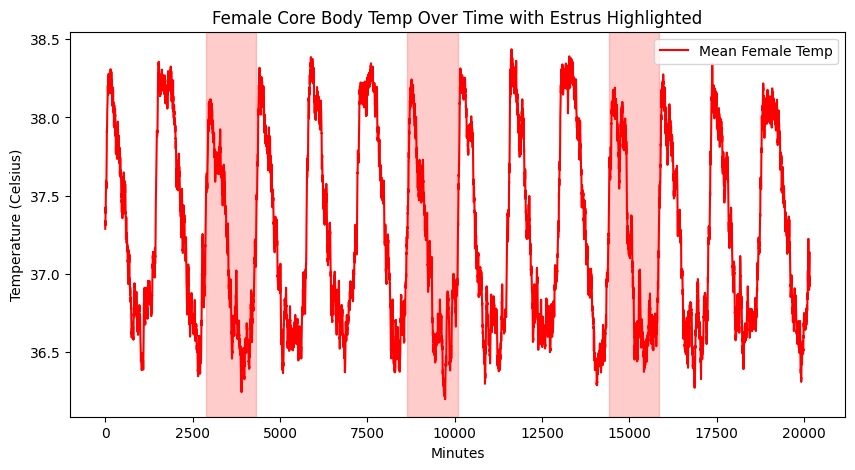

In [25]:
#Average Female Core Body Temp
female_avg_temp = female_temp.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(female_avg_temp, label="Mean Female Temp", color='red')

# highlight estrus periods (every 4 days starting at day 2, minute 2880)
for start_day in range(2, 14, 4):
    start_minute = start_day * minutes_per_day
    end_minute = (start_day + 1) * minutes_per_day
    plt.axvspan(start_minute, end_minute, color='red', alpha=0.2)

plt.title("Female Core Body Temp Over Time with Estrus Highlighted")
plt.xlabel("Minutes")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.show()

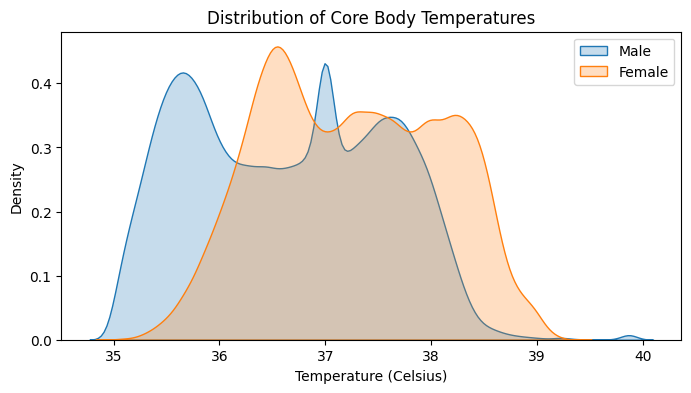

In [26]:
# Core Body Temp Distribution
male_temp_vals = male_temp.values.flatten()
female_temp_vals = female_temp.values.flatten()

plt.figure(figsize=(8, 4))
sns.kdeplot(male_temp_vals, label="Male", fill=True)
sns.kdeplot(female_temp_vals, label="Female", fill=True)
plt.title("Distribution of Core Body Temperatures")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Density")
plt.legend()
plt.show()